### Cascade Classifier

In [36]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


# from __future__ import print_function
import cv2 as cv
import argparse

def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)

    cv.imshow('Capture - Face detection', frame)

face_cascade_name = './haarcascade_frontalface_alt.xml'
eyes_cascade_name = './haarcascade_eye_tree_eyeglasses.xml'
camera_device = 0

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)


camera_device = 0
#-- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv.waitKey(10) == "q":
        break


KeyboardInterrupt: 

### Hough Line Transform

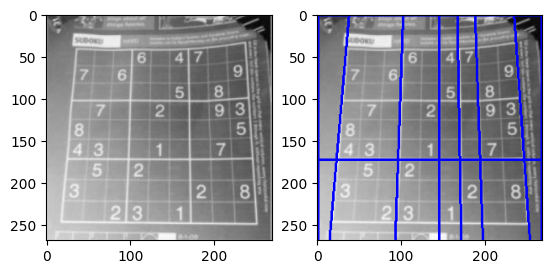

In [22]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread(cv.samples.findFile('sudoku.png'))
img = cv.bitwise_not(img)
orig = img.copy()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1.65,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)


plt.subplot(121),plt.imshow(orig)
plt.subplot(122),plt.imshow(img)
plt.show()

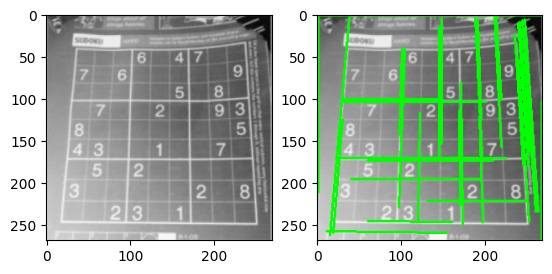

In [23]:
import cv2 as cv
import numpy as np
img = cv.imread(cv.samples.findFile('sudoku.png'))
img = cv.bitwise_not(img)
orig = img.copy()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.subplot(121),plt.imshow(orig)
plt.subplot(122),plt.imshow(img)
plt.show()

Hough Circle Transform

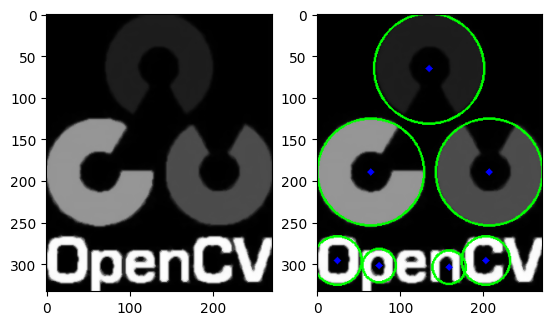

In [31]:
import numpy as np
import cv2 as cv
img = cv.imread('opencv-logo-white.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
orig = cimg.copy()
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


plt.subplot(121),plt.imshow(orig)
plt.subplot(122),plt.imshow(cimg)
plt.show()